<img src="https://upload.wikimedia.org/wikipedia/fr/0/0b/Polytech_Lyon_logo.png" alt="drawing" height="200"/>

# Traitement de données & Programmation en Python
---



# TD 06

Traitement de données

Elements à consulter:





Doc                                   |             Link
--------------------------------------|------------------------------------
Github Helper      | [>link<](#scrollTo=Github_101)
Python en 30 jours | [>link<](https://moncoachdata.com/courses/apprendre-python-en-30-jours/)
Get started with pandas | [>link<](https://colab.research.google.com/notebooks/snippets/pandas.ipynb)

## Intro

Le premier bloc devrait toujours contenir les installs/imports dont on aura besoin pour le reste

In [1]:
# Installs
print("Python is awesome 👍")

Python is awesome 👍


## EX01
### Dataframes

* Importer la librairie pandas
* lire dataset 'tv_shows.csv' dans une variable tv_data
* Afficher les 10 premieres lignes du dataset
* Créer une colonne "sreaming_platform" qui contient le nom de la plateforme de streaming en se basant sur les colonnes (hulu, prime, disney, netflix)
* Drop les colonnes (hulu, prime, disney, netflix)
* Afficher le nombre de shows par plateforme de streaming
* Afficher la note moyenne (imdb) par plateforme de streaming
* Assigner a une variable top_shows, les meilleurs shows par plateforme de streaming et afficher cette dernière
> bonus 
* Faire un graphique avec le nombre de shows par année (sur Y, et sur l'axe X les années) par plateforme de streaming (en series). Libres sur le choix du graphique [help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

Colonne Streaming Platform ajoutée
---------
Colonnes Netflix, Hulu, Disney+ et Prime Vidéo supprimées
---------
AxesSubplot(0.125,0.11;0.775x0.77)


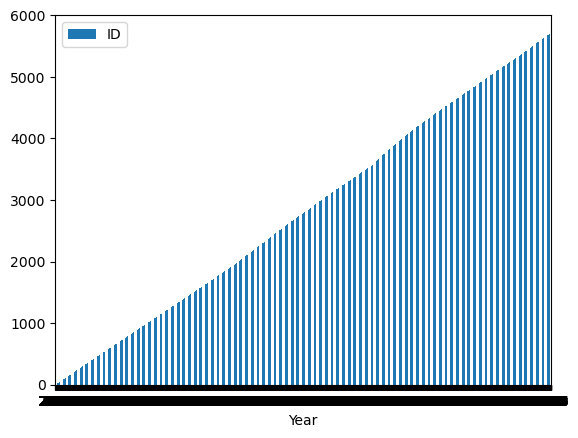

In [138]:
# Code here
import pandas as pd

data = pd.read_csv('./tv_shows.csv', delimiter="|")

# affiche les 10 premieres lignes
#print(data.head(10))

# creation de la colonne Streaming Platform
data.loc[(data['Netflix'] == 1) | (data['Hulu'] == 1) | (data['Disney+'] == 1) | (data['Prime Video'] == 1), 'Streaming Platform'] = ''
data.loc[data['Netflix'] == 1, 'Streaming Platform'] += 'Netflix '
data.loc[data['Hulu'] == 1, 'Streaming Platform'] += 'Hulu '
data.loc[data['Disney+'] == 1, 'Streaming Platform'] += 'Disney+ '
data.loc[data['Prime Video'] == 1, 'Streaming Platform'] += 'Prime '

print("Colonne Streaming Platform ajoutée")
print("---------")

#Suppression des colonnes Hulu, Prime Video, Netflix et Disney +
data.drop('Netflix', inplace=True, axis=1)
data.drop('Prime Video', inplace=True, axis=1)
data.drop('Hulu', inplace=True, axis=1)
data.drop('Disney+', inplace=True, axis=1)

print("Colonnes Netflix, Hulu, Disney+ et Prime Vidéo supprimées")
print("---------")

#Compte le nombre de shows par plateforme
netflix_shows = 0
hulu_shows = 0
disney_shows = 0
prime_shows = 0

for liste_show in data['Streaming Platform'] : 
    if "Netflix" in liste_show:
        netflix_shows += 1
    if "Hulu" in liste_show:
        hulu_shows += 1
    if "Disney+" in liste_show:
        disney_shows += 1
    if "Prime" in liste_show:
        prime_shows += 1
        
print(f"Nombre de shows pour Netflix : {netflix_shows}")
print(f"Nombre de shows pour Hulu : {hulu_shows}")
print(f"Nombre de shows pour Disney : {disney_shows}")
print(f"Nombre de shows pour Prime Video : {prime_shows}")
print("---------")

#moyenne par plateforme et meilleur par plateforme
netflix_moyenne = 0
hulu_moyenne = 0
disney_moyenne = 0
prime_moyenne = 0

netflix_note = 0
hulu_note = 0
disney_note = 0
prime_note = 0

best_netflix = ""
best_hulu = ""
best_disney = ""
best_prime = ""

best_note_netflix = 0
best_note_hulu = 0
best_note_disney = 0
best_note_prime = 0

for show in range(0,data['ID'].count()):
    if "Netflix" in data.iloc[show]['Streaming Platform']:
        note = data.iloc[show]['Rotten Tomatoes']
        floated_note = float(note[:-4])
        netflix_note += floated_note
        if best_note_netflix < floated_note:
            best_note_netflix = floated_note
            best_netflix = data.iloc[show]['Title']

    if "Hulu" in data.iloc[show]['Streaming Platform']:
        note = data.iloc[show]['Rotten Tomatoes']
        floated_note = float(note[:-4])
        hulu_note += floated_note
        if best_note_hulu < floated_note:
            best_note_hulu = floated_note
            best_hulu = data.iloc[show]['Title']

    if "Disney+" in data.iloc[show]['Streaming Platform']:
        note = data.iloc[show]['Rotten Tomatoes']
        floated_note = float(note[:-4])
        disney_note += floated_note
        if best_note_disney < floated_note:
            best_note_disney = floated_note
            best_disney = data.iloc[show]['Title']

    if "Prime" in data.iloc[show]['Streaming Platform']:
        note = data.iloc[show]['Rotten Tomatoes']
        floated_note = float(note[:-4])
        prime_note += floated_note
        if best_note_prime < floated_note:
            best_note_prime = floated_note
            best_prime = data.iloc[show]['Title']
        
netflix_moyenne = float(netflix_note) / netflix_shows
hulu_moyenne = float(hulu_note) / hulu_shows
disney_moyenne = float(disney_note) / disney_shows
prime_moyenne = float(prime_note) / prime_shows

top_shows = {}
top_shows['Netflix'] = [best_netflix, best_note_netflix]
top_shows['Hulu'] = [best_hulu, best_note_hulu]
top_shows['Disney+'] = [best_disney, best_note_disney]
top_shows['Prime Video'] = [best_prime, best_note_prime]

print(f"Moyenne pour Netflix : {netflix_moyenne:.2f}")
print(f"Moyenne pour Hulu : {hulu_moyenne:.2f}")
print(f"Moyenne pour Disney : {disney_moyenne:.2f}")
print(f"Moyenne pour Prime Video : {prime_moyenne:.2f}")
print("---------")
print(f"Le meilleur titre de Netflix est {top_shows['Netflix'][0]} avec comme note {top_shows['Netflix'][1]}/100")
print(f"Le meilleur titre de Hulu est {top_shows['Hulu'][0]} avec comme note {top_shows['Hulu'][1]}/100")
print(f"Le meilleur titre de Disney+ est {top_shows['Disney+'][0]} avec comme note {top_shows['Disney+'][1]}/100")
print(f"Le meilleur titre de Prime Video est {top_shows['Prime Video'][0]} avec comme note {top_shows['Prime Video'][1]}/100")


##EX02
### Pandas Power

TBD (apres la pause)

In [8]:
# Code here
